# Predicting the grade of students (Math and Portugal) using a set of demographic features

### 1. Import of necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

### 2. Import of dataframes

In [2]:
student_mat = pd.read_csv('C:/Users/Admin/Desktop/Skoltech/DS/HW2/student-mat.csv', sep=';', engine='python')
student_por = pd.read_csv('C:/Users/Admin/Desktop/Skoltech/DS/HW2/student-por.csv', sep=';', engine='python')

In [3]:
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### 3. Separating nominal features to different columns with binary values
### encoding 'yes' and 'no' variables to binary 1 and 0
### encoding final score to 1-5 scale

In [5]:
student_mat_separate = pd.get_dummies(student_mat, dummy_na=False, columns=['Mjob','Fjob','reason','guardian',])
student_por_separate = pd.get_dummies(student_por, dummy_na=False, columns=['Mjob','Fjob','reason','guardian',])

In [6]:
student_mat_separate["school"] = student_mat_separate.school.map({"GP": 0, "MS":1})
student_mat_separate['sex'] = student_mat_separate.sex.map({"F": 0, "M":1})
student_mat_separate['address'] = student_mat_separate.address.map({"U": 0, "R":1})
student_mat_separate['famsize'] = student_mat_separate.famsize.map({"LE3": 0, "GT3":1})
student_mat_separate['Pstatus'] = student_mat_separate.Pstatus.map({"T": 0, "A":1})
student_mat_separate['schoolsup'] = student_mat_separate.schoolsup.map({'no': 0, "yes":1})
student_mat_separate['famsup'] = student_mat_separate.famsup.map({'no': 0, "yes":1})
student_mat_separate['paid'] = student_mat_separate.paid.map({'no': 0, "yes":1})
student_mat_separate['activities'] = student_mat_separate.activities.map({'no': 0, "yes":1})
student_mat_separate['nursery'] = student_mat_separate.nursery.map({'no': 0, "yes":1})
student_mat_separate['higher'] = student_mat_separate.higher.map({'no': 0, "yes":1})
student_mat_separate['internet'] = student_mat_separate.internet.map({'no': 0, "yes":1})
student_mat_separate['romantic'] = student_mat_separate.romantic.map({'no': 0, "yes":1})

student_por_separate["school"] = student_por_separate.school.map({"GP": 0, "MS":1})
student_por_separate['sex'] = student_por_separate.sex.map({"F": 0, "M":1})
student_por_separate['address'] = student_por_separate.address.map({"U": 0, "R":1})
student_por_separate['famsize'] = student_por_separate.famsize.map({"LE3": 0, "GT3":1})
student_por_separate['Pstatus'] = student_por_separate.Pstatus.map({"T": 0, "A":1})
student_por_separate['schoolsup'] = student_por_separate.schoolsup.map({'no': 0, "yes":1})
student_por_separate['famsup'] = student_por_separate.famsup.map({'no': 0, "yes":1})
student_por_separate['paid'] = student_por_separate.paid.map({'no': 0, "yes":1})
student_por_separate['activities'] = student_por_separate.activities.map({'no': 0, "yes":1})
student_por_separate['nursery'] = student_por_separate.nursery.map({'no': 0, "yes":1})
student_por_separate['higher'] = student_por_separate.higher.map({'no': 0, "yes":1})
student_por_separate['internet'] = student_por_separate.internet.map({'no': 0, "yes":1})
student_por_separate['romantic'] = student_por_separate.romantic.map({'no': 0, "yes":1})

In [7]:
student_mat_separate['final_grade'] = 0
student_mat_separate.loc[(student_mat_separate.G3 >= 0) & (student_mat_separate.G3 < 4), 'final_grade'] = 1
student_mat_separate.loc[(student_mat_separate.G3 >= 4) & (student_mat_separate.G3 < 8), 'final_grade'] = 2
student_mat_separate.loc[(student_mat_separate.G3 >= 8) & (student_mat_separate.G3 < 12), 'final_grade'] = 3
student_mat_separate.loc[(student_mat_separate.G3 >= 12) & (student_mat_separate.G3 < 16), 'final_grade'] = 4
student_mat_separate.loc[(student_mat_separate.G3 >= 16) & (student_mat_separate.G3 < 20), 'final_grade'] = 5

student_por_separate['final_grade'] = 0
student_por_separate.loc[(student_por_separate.G3 >= 0) & (student_por_separate.G3 < 4), 'final_grade'] = 1
student_por_separate.loc[(student_por_separate.G3 >= 4) & (student_por_separate.G3 < 8), 'final_grade'] = 2
student_por_separate.loc[(student_por_separate.G3 >= 8) & (student_por_separate.G3 < 12), 'final_grade'] = 3
student_por_separate.loc[(student_por_separate.G3 >= 12) & (student_por_separate.G3 < 16), 'final_grade'] = 4
student_por_separate.loc[(student_por_separate.G3 >= 16) & (student_por_separate.G3 < 20), 'final_grade'] = 5

In [8]:
student_mat_separate.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,final_grade
0,0,0,18,0,1,1,4,4,2,2,...,0,1,1,0,0,0,0,1,0,2
1,0,0,17,0,1,0,1,1,1,2,...,0,0,1,0,0,0,1,0,0,2
2,0,0,15,0,0,0,1,1,1,2,...,0,0,0,0,1,0,0,1,0,3
3,0,0,15,0,1,0,4,2,1,3,...,1,0,0,1,0,0,0,1,0,4
4,0,0,16,0,1,0,3,3,1,2,...,0,0,0,1,0,0,1,0,0,3


In [9]:
student_por_separate.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,final_grade
0,0,0,18,0,1,1,4,4,2,2,...,0,1,1,0,0,0,0,1,0,3
1,0,0,17,0,1,0,1,1,1,2,...,0,0,1,0,0,0,1,0,0,3
2,0,0,15,0,0,0,1,1,1,2,...,0,0,0,0,1,0,0,1,0,4
3,0,0,15,0,1,0,4,2,1,3,...,1,0,0,1,0,0,0,1,0,4
4,0,0,16,0,1,0,3,3,1,2,...,0,0,0,1,0,0,1,0,0,4


In [10]:
student_mat_separate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 47 columns):
school               395 non-null int64
sex                  395 non-null int64
age                  395 non-null int64
address              395 non-null int64
famsize              395 non-null int64
Pstatus              395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
schoolsup            395 non-null int64
famsup               395 non-null int64
paid                 395 non-null int64
activities           395 non-null int64
nursery              395 non-null int64
higher               395 non-null int64
internet             395 non-null int64
romantic             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc           

In [11]:
student_por_separate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 47 columns):
school               649 non-null int64
sex                  649 non-null int64
age                  649 non-null int64
address              649 non-null int64
famsize              649 non-null int64
Pstatus              649 non-null int64
Medu                 649 non-null int64
Fedu                 649 non-null int64
traveltime           649 non-null int64
studytime            649 non-null int64
failures             649 non-null int64
schoolsup            649 non-null int64
famsup               649 non-null int64
paid                 649 non-null int64
activities           649 non-null int64
nursery              649 non-null int64
higher               649 non-null int64
internet             649 non-null int64
romantic             649 non-null int64
famrel               649 non-null int64
freetime             649 non-null int64
goout                649 non-null int64
Dalc           

### 4. Correlation with final grade

In [12]:
cor_mat = student_mat_separate.corr()
cor_por = student_por_separate.corr()

In [13]:
cor_mat['final_grade'].head(60)

school              -0.039626
sex                  0.113256
age                 -0.130073
address             -0.101514
famsize             -0.100995
Pstatus              0.036994
Medu                 0.189202
Fedu                 0.140803
traveltime          -0.108436
studytime            0.056100
failures            -0.330959
schoolsup           -0.095328
famsup              -0.026881
paid                 0.091389
activities          -0.001368
nursery              0.048419
higher               0.145963
internet             0.094450
romantic            -0.094142
famrel               0.039574
freetime             0.038110
goout               -0.103756
Dalc                -0.020802
Walc                -0.021942
health              -0.038128
absences             0.032878
G1                   0.757004
G2                   0.851745
G3                   0.935743
Mjob_at_home        -0.108308
Mjob_health          0.078896
Mjob_other          -0.087880
Mjob_services        0.085226
Mjob_teach

In [14]:
cor_por['final_grade'].head(60)

school              -0.260658
sex                 -0.133919
age                 -0.112819
address             -0.164190
famsize             -0.038322
Pstatus             -0.007555
Medu                 0.253452
Fedu                 0.232433
traveltime          -0.152587
studytime            0.248409
failures            -0.367993
schoolsup           -0.056118
famsup               0.063103
paid                -0.031917
activities           0.091689
nursery              0.040858
higher               0.325009
internet             0.151281
romantic            -0.071046
famrel               0.069433
freetime            -0.133310
goout               -0.099807
Dalc                -0.205206
Walc                -0.179374
health              -0.091319
absences            -0.104050
G1                   0.805210
G2                   0.880990
G3                   0.942146
Mjob_at_home        -0.173687
Mjob_health          0.103829
Mjob_other          -0.032910
Mjob_services        0.039016
Mjob_teach

#### There some important functions can be distinguished: gender, parent educational level, alcohol consume, desire to take higher education and  home location

### 5. Separating some of important features andchart plot

#### 5.1 Gender-dependence of final grade

In [15]:
perc = (lambda col: col/col.sum())
index = [1,2,3,4,5]

In [16]:
gender_mat = pd.crosstab(index=student_mat_separate.final_grade, columns=student_mat_separate.sex)
gender_mat = gender_mat.apply(perc).reindex(index)

In [17]:
gender_por = pd.crosstab(index=student_por_separate.final_grade, columns=student_por_separate.sex)
gender_por = gender_por.apply(perc).reindex(index)

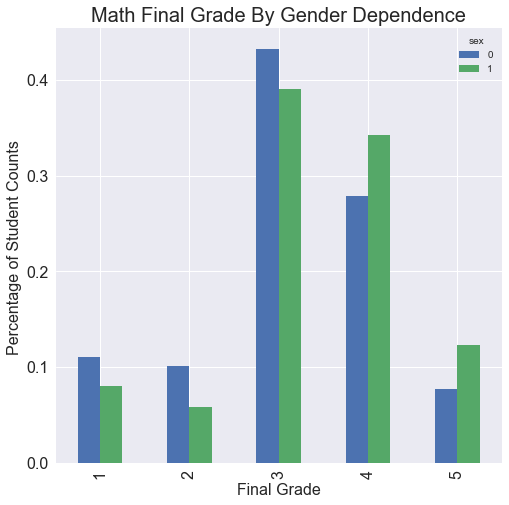

In [18]:
#female=0 male=1
plt.figure()
gender_mat.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Math Final Grade By Gender Dependence', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

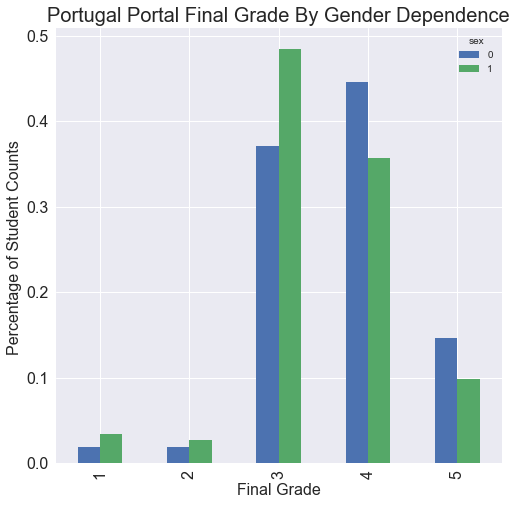

In [19]:
#female=0 male=1
plt.figure()
gender_por.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Portugal Portal Final Grade By Gender Dependence', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### Here clear seen that males have better score in math, female's - in portugal

#### 5.2 Mother/father education level dependence of final grade

Text(0,0.5,'Density of number of Student')

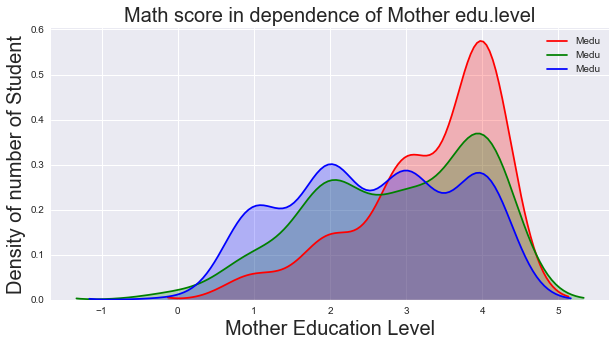

In [20]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_mat_separate.Medu[student_mat_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_mat_separate.Medu[student_mat_separate.final_grade == 4], shade=True, color="g")
p2=sns.kdeplot(student_mat_separate.Medu[student_mat_separate.final_grade <= 3], shade=True, color="b")
plt.title('Math score in dependence of Mother edu.level', fontsize=20)
plt.xlabel('Mother Education Level', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

Text(0,0.5,'Density of number of Student')

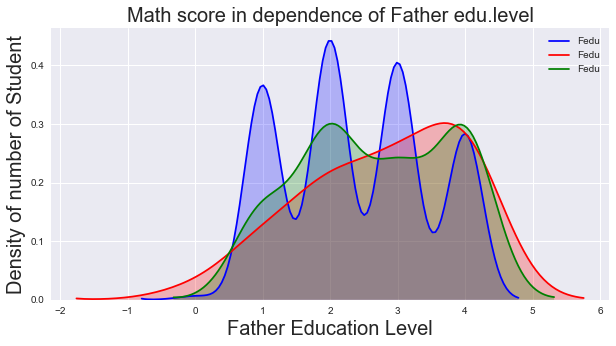

In [21]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_mat_separate.Fedu[student_mat_separate.final_grade <= 3], shade=True, color="b")
p2=sns.kdeplot(student_mat_separate.Fedu[student_mat_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_mat_separate.Fedu[student_mat_separate.final_grade == 4], shade=True, color="g")
plt.title('Math score in dependence of Father edu.level', fontsize=20)
plt.xlabel('Father Education Level', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

Text(0,0.5,'Density of number of Student')

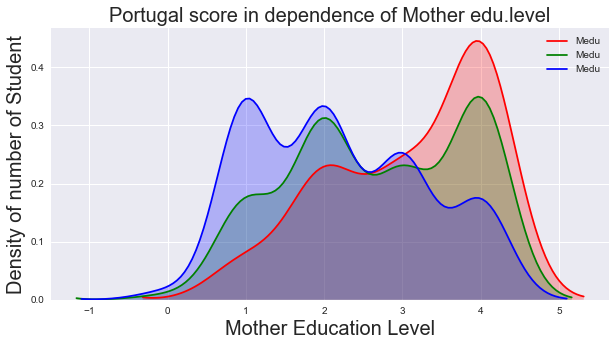

In [22]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_por_separate.Medu[student_por_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_por_separate.Medu[student_por_separate.final_grade == 4], shade=True, color="g")
p2=sns.kdeplot(student_por_separate.Medu[student_por_separate.final_grade <= 3], shade=True, color="b")
plt.title('Portugal score in dependence of Mother edu.level', fontsize=20)
plt.xlabel('Mother Education Level', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

Text(0,0.5,'Density of number of Student')

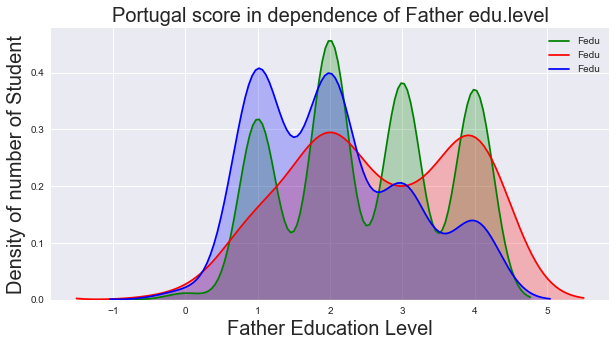

In [23]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_por_separate.Fedu[student_por_separate.final_grade == 4], shade=True, color="g")
p2=sns.kdeplot(student_por_separate.Fedu[student_por_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_por_separate.Fedu[student_por_separate.final_grade <= 3], shade=True, color="b")
plt.title('Portugal score in dependence of Father edu.level', fontsize=20)
plt.xlabel('Father Education Level', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

#### Here we can observe strong correlation between educational level of student's mother and good marks (in math and portugal) of student. Father education level hasn't such dependence.

#### 5.3 Impact of alcohol consume to final score

Text(0,0.5,'Density of number of Student')

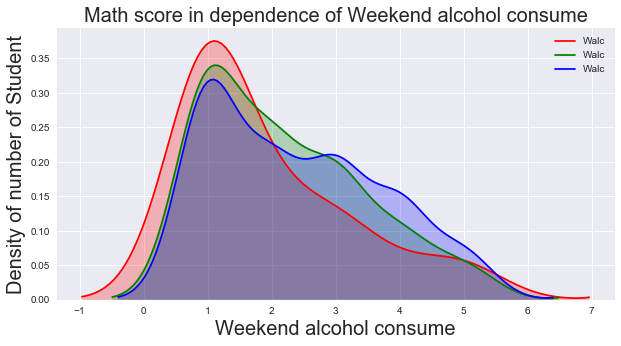

In [24]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_mat_separate.Walc[student_mat_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_mat_separate.Walc[student_mat_separate.final_grade == 4], shade=True, color="g")
p2=sns.kdeplot(student_mat_separate.Walc[student_mat_separate.final_grade <= 3], shade=True, color="b")
plt.title('Math score in dependence of Weekend alcohol consume', fontsize=20)
plt.xlabel('Weekend alcohol consume', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

Text(0,0.5,'Density of number of Student')

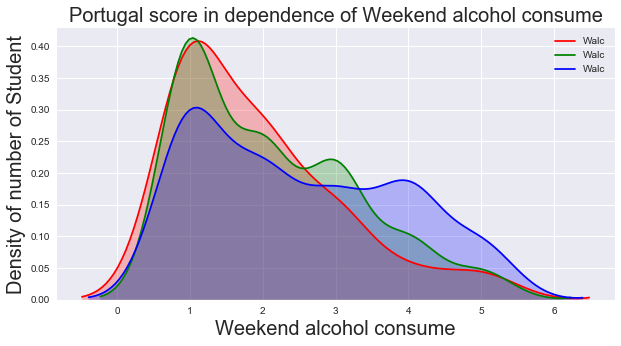

In [25]:
plt.figure(figsize=(10,5))
p2=sns.kdeplot(student_por_separate.Walc[student_por_separate.final_grade == 5], shade=True, color="r")
p2=sns.kdeplot(student_por_separate.Walc[student_por_separate.final_grade == 4], shade=True, color="g")
p2=sns.kdeplot(student_por_separate.Walc[student_por_separate.final_grade <= 3], shade=True, color="b")
plt.title('Portugal score in dependence of Weekend alcohol consume', fontsize=20)
plt.xlabel('Weekend alcohol consume', fontsize=20)
plt.ylabel('Density of number of Student', fontsize=20)

#### We can see that less alcohol consuming correlates with better final score, and a large amount of alcohol gives a bad result in both disciplines

#### 5.4 Impact of desire to take higher education to final score

In [26]:
higher_mat = pd.crosstab(index=student_mat_separate.final_grade, columns=student_mat_separate.higher)
higher_mat = higher_mat.apply(perc).reindex(index)

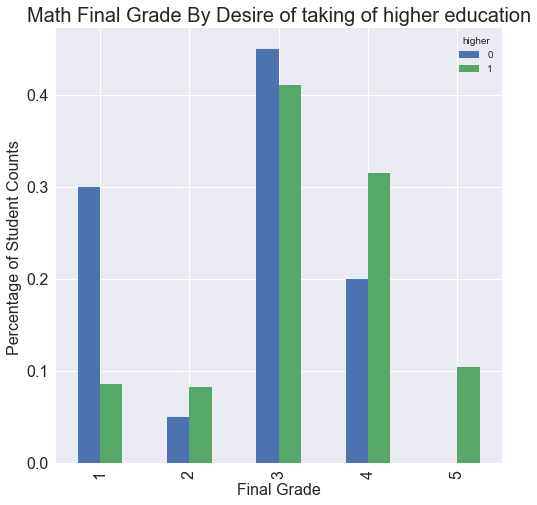

In [27]:
#no=0, yes=1
plt.figure()
higher_mat.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Math Final Grade By Desire of taking of higher education', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [28]:
higher_por = pd.crosstab(index=student_por_separate.final_grade, columns=student_por_separate.higher)
higher_por = higher_por.apply(perc).reindex(index)

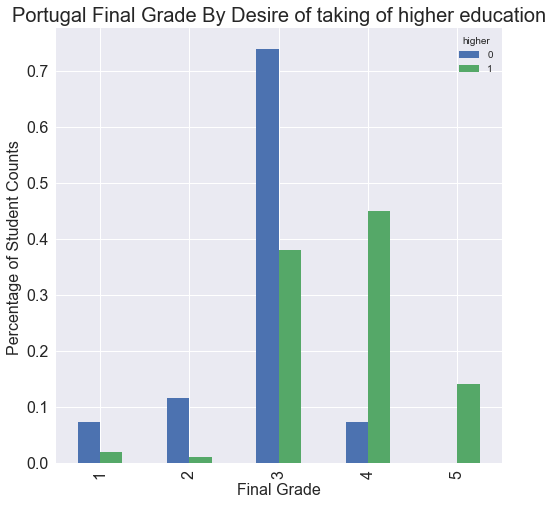

In [29]:
#no=0, yes=1
plt.figure()
higher_por.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Portugal Final Grade By Desire of taking of higher education', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### There is observed correlation between desire to take higher education and good final marks

#### 5.5 Impact of address to final score

In [30]:
address_mat = pd.crosstab(index=student_mat_separate.final_grade, columns=student_mat_separate.address)
address_mat = address_mat.apply(perc).reindex(index)

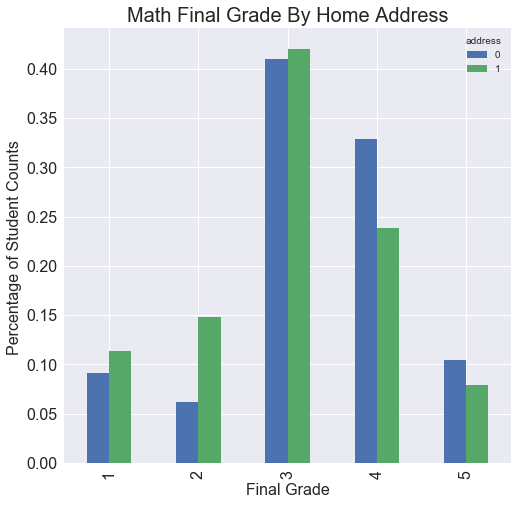

In [31]:
#Urban=0, Rural=1
plt.figure()
address_mat.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Math Final Grade By Home Address', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [32]:
address_por = pd.crosstab(index=student_por_separate.final_grade, columns=student_por_separate.address)
address_por = address_por.apply(perc).reindex(index)

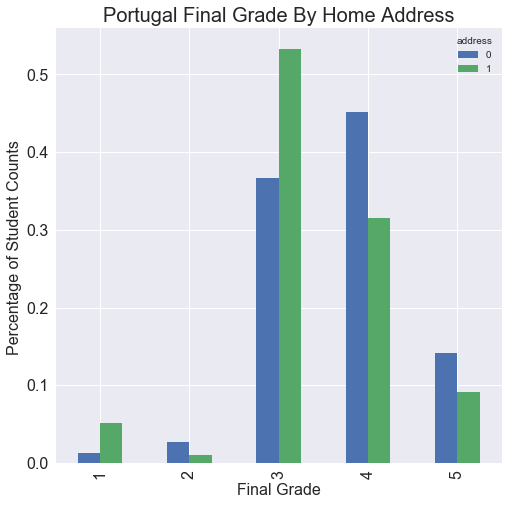

In [33]:
#Urban=0, Rural=1
plt.figure()
address_por.plot.bar(fontsize=16, figsize=(8,8))
plt.title('Portugal Final Grade By Home Address', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

#### There is observed correlation between the address of the house and good final marks: students from cities have better grades

### 6. Classification

#### 6.1 Preparing of datasets

In [34]:
mat = student_mat_separate.copy()
mat = mat.drop([ 'G3'], axis=1)

In [35]:
por = student_por_separate.copy()
por = por.drop([ 'G3'], axis=1)

In [36]:
from sklearn import preprocessing
label_encode = preprocessing.LabelEncoder()
mat.final_grade = label_encode.fit_transform(mat.final_grade)
por.final_grade = label_encode.fit_transform(por.final_grade)

In [37]:
from sklearn.model_selection import train_test_split
X_mat = mat.drop('final_grade',axis=1)
Y_mat = mat.final_grade
X_mat_train, X_mat_test,Y_mat_train, Y_mat_test= train_test_split(X_mat, Y_mat, test_size=0.3)

X_por = por.drop('final_grade',axis=1)
Y_por = por.final_grade
X_por_train, X_por_test,Y_por_train, Y_por_test= train_test_split(X_por, Y_por, test_size=0.3)

In [38]:
X_mat_train = pd.get_dummies(X_mat_train)
X_mat_test = pd.get_dummies(X_mat_test)

X_por_train = pd.get_dummies(X_por_train)
X_por_test = pd.get_dummies(X_por_test)

In [39]:
len(list(X_mat_train))

45

In [40]:
len(list(X_por_train))

45

#### 6.2 Decision Tree Classification

In [49]:
from sklearn.tree import DecisionTreeClassifier

min_sampl=[]
for i in range(1,45):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_mat_train, Y_mat_train)
    ts=t.score(X_mat_test, Y_mat_test)
    min_sampl.append(ts)
min_sampl = pd.Series(min_sampl)
min_sampl.where(min_sampl==min_sampl.max()).dropna()

11    0.848739
12    0.848739
13    0.848739
14    0.848739
15    0.848739
16    0.848739
17    0.848739
dtype: float64

In [50]:
tree = DecisionTreeClassifier(min_samples_leaf=11)
t= tree.fit(X_mat_train, Y_mat_train)
print("Decisioin Tree Model Score (MATH)" , ":" , t.score(X_mat_train, Y_mat_train) , "," , 
      "Cross Validation Score (MATH)" ,":" , t.score(X_mat_test, Y_mat_test))

Decisioin Tree Model Score (MATH) : 0.833333333333 , Cross Validation Score (MATH) : 0.840336134454


In [51]:
min_sampl_por=[]
for i in range(1,45):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_por_train, Y_por_train)
    ts=t.score(X_por_test, Y_por_test)
    min_sampl_por.append(ts)
min_sampl_por = pd.Series(min_sampl_por)
min_sampl_por.where(min_sampl_por==min_sampl_por.max()).dropna()

25    0.887179
26    0.887179
27    0.887179
28    0.887179
29    0.887179
30    0.887179
31    0.887179
32    0.887179
33    0.887179
34    0.887179
35    0.887179
36    0.887179
37    0.887179
38    0.887179
39    0.887179
dtype: float64

In [52]:
tree = DecisionTreeClassifier(min_samples_leaf = 25)
t= tree.fit(X_por_train, Y_por_train)
print("Decisioin Tree Model Score (PORTUGAL)" , ":" , t.score(X_por_train, Y_por_train) , "," , 
      "Cross Validation Score (PORTUGAL)" ,":" , t.score(X_por_test, Y_por_test))

Decisioin Tree Model Score (PORTUGAL) : 0.843612334802 , Cross Validation Score (PORTUGAL) : 0.871794871795


#### 6.3 Random Forest Classification

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_mat=[]
for i in range(1,45):
    forest = RandomForestClassifier()
    f = forest.fit(X_mat_train, Y_mat_train)
    fs = f.score(X_mat_test, Y_mat_test)
    rf_mat.append(fs)
rf_mat = pd.Series(rf_mat)
rf_mat.where(rf_mat==rf_mat.max()).dropna()

18    0.781513
dtype: float64

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_mat=[]
for i in range(1,45):
    forest = RandomForestClassifier(n_estimators=18, min_samples_leaf=i)
    f = forest.fit(X_mat_train, Y_mat_train)
    fs = f.score(X_mat_test, Y_mat_test)
    rf_mat.append(fs)
rf_mat = pd.Series(rf_mat)
rf_mat.where(rf_mat==rf_mat.max()).dropna()

2    0.731092
dtype: float64

In [56]:
forest = RandomForestClassifier(n_estimators=18, min_samples_leaf=2)
f = forest.fit(X_mat_train, Y_mat_train)
print("Random Forest Model Score (MATH)" , ":" , f.score(X_mat_train, Y_mat_train) , "," ,
      "Cross Validation Score (MATH)" ,":" , f.score(X_mat_test, Y_mat_test))

Raondom Forest Model Score (MATH) : 0.971014492754 , Cross Validation Score (MATH) : 0.72268907563


In [57]:
rf_por=[]
for i in range(1,45):
    forest = RandomForestClassifier()
    f = forest.fit(X_por_train, Y_por_train)
    fs = f.score(X_por_test, Y_por_test)
    rf_por.append(fs)
rf_por = pd.Series(rf_por)
rf_por.where(rf_por==rf_por.max()).dropna()

8    0.876923
dtype: float64

In [58]:
rf_por=[]
for i in range(1,45):
    forest = RandomForestClassifier(n_estimators=8, min_samples_leaf=i)
    f = forest.fit(X_por_train, Y_por_train)
    fs = f.score(X_por_test, Y_por_test)
    rf_por.append(fs)
rf_por = pd.Series(rf_por)
rf_por.where(rf_por==rf_por.max()).dropna()

12    0.876923
dtype: float64

In [60]:
forest = RandomForestClassifier(n_estimators=12, min_samples_leaf=3)
f = forest.fit(X_por_train, Y_por_train)
print("Raondom Forest Model Score (PORTUGAL)" , ":" , f.score(X_por_train, Y_por_train) , "," ,
      "Cross Validation Score (PORTUGAL)" ,":" , f.score(X_por_test, Y_por_test))

Raondom Forest Model Score (PORTUGAL) : 0.92731277533 , Cross Validation Score (PORTUGAL) : 0.835897435897


#### 6.4 Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)
log_reg1 = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [66]:
# optimal number of features
from sklearn.feature_selection import SelectKBest, chi2

k=[]
for i in range(1,45):
    sk = SelectKBest(chi2, k=i)
    X_mat_new = sk.fit_transform(X_mat_train, Y_mat_train)
    X_mat_new_test=sk.fit_transform(X_mat_test,Y_mat_test)
    l = log_reg.fit(X_mat_new, Y_mat_train)
    ll = l.score(X_mat_new_test, Y_mat_test)
    k.append(ll)  
    
k = pd.Series(k)
k = k.reindex(list(range(1,45)))
k

1     0.865546
2     0.831933
3     0.831933
4     0.075630
5     0.268908
6     0.268908
7     0.193277
8     0.201681
9     0.210084
10    0.100840
11    0.100840
12    0.100840
13    0.109244
14    0.100840
15    0.100840
16    0.100840
17    0.075630
18    0.100840
19    0.084034
20    0.084034
21    0.092437
22    0.075630
23    0.084034
24    0.084034
25    0.067227
26    0.067227
27    0.067227
28    0.058824
29    0.058824
30    0.058824
31    0.084034
32    0.092437
33    0.092437
34    0.092437
35    0.084034
36    0.084034
37    0.369748
38    0.092437
39    0.092437
40    0.075630
41    0.075630
42    0.075630
43    0.781513
44         NaN
dtype: float64

Text(0,0.5,'Prediction Accuracy')

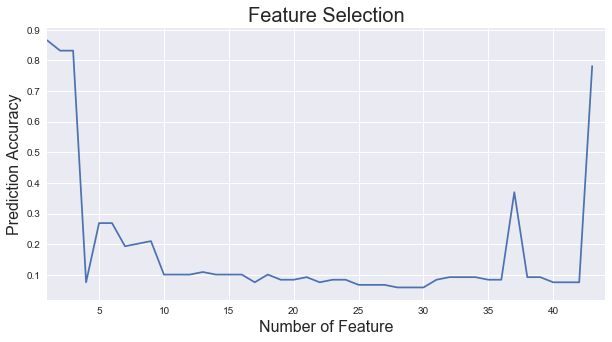

In [67]:
plt.figure(figsize=(10,5))
k.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [68]:
k.where(k==k.max()).dropna()

1    0.865546
dtype: float64

In [69]:
# final model
sk = SelectKBest(chi2, k=2)
X_mat_new = sk.fit_transform(X_mat_train,Y_mat_train)
X_mat_new_test=sk.fit_transform(X_mat_test,Y_mat_test)
log_reg = log_reg.fit(X_mat_new, Y_mat_train)
print("Logistic Regression Model Score (MATH)" , ":" , log_reg.score(X_mat_new, Y_mat_train) , "," ,
      "Cross Validation Score (MATH)" ,":" , log_reg.score(X_mat_new_test, Y_mat_test))

Logistic Regression Model Score (MATH) : 0.826086956522 , Cross Validation Score (MATH) : 0.865546218487


In [70]:
t=[]
for i in range(1,45):
    st = SelectKBest(chi2, k=i)
    X_por_new = st.fit_transform(X_por_train, Y_por_train)
    X_por_new_test=st.fit_transform(X_por_test,Y_por_test)
    l = log_reg1.fit(X_por_new, Y_por_train)
    ll = l.score(X_por_new_test, Y_por_test)
    t.append(ll)  
    
t = pd.Series(t)
t = t.reindex(list(range(1,45)))
t

1     0.825641
2     0.820513
3     0.835897
4     0.851282
5     0.476923
6     0.856410
7     0.010256
8     0.841026
9     0.851282
10    0.851282
11    0.010256
12    0.010256
13    0.010256
14    0.015385
15    0.015385
16    0.010256
17    0.015385
18    0.015385
19    0.015385
20    0.076923
21    0.015385
22    0.092308
23    0.846154
24    0.482051
25    0.456410
26    0.435897
27    0.482051
28    0.482051
29    0.482051
30    0.487179
31    0.800000
32    0.153846
33    0.830769
34    0.158974
35    0.158974
36    0.164103
37    0.312821
38    0.338462
39    0.010256
40    0.317949
41    0.666667
42    0.666667
43    0.841026
44         NaN
dtype: float64

Text(0,0.5,'Prediction Accuracy')

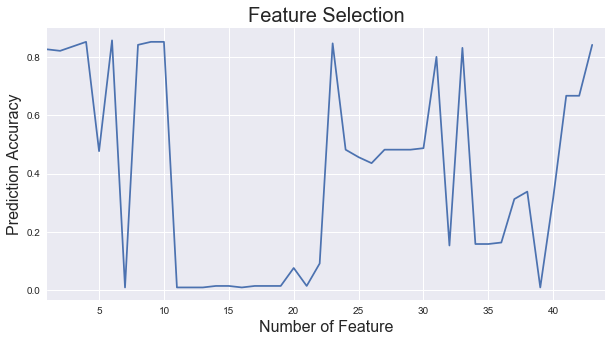

In [72]:
plt.figure(figsize=(10,5))
t.plot.line()
plt.title('Feature Selection', fontsize=20)
plt.xlabel('Number of Feature', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [73]:
t.where(t==t.max()).dropna()

6    0.85641
dtype: float64

In [75]:
# final model
st = SelectKBest(chi2, k=4)
X_por_new = st.fit_transform(X_por_train,Y_por_train)
X_por_new_test=st.fit_transform(X_por_test,Y_por_test)
log_reg1 = log_reg1.fit(X_por_new, Y_por_train)
print("Logistic Regression Model Score (MATH)" , ":" , log_reg1.score(X_por_new, Y_por_train) , "," ,
      "Cross Validation Score (MATH)" ,":" , log_reg1.score(X_por_new_test, Y_por_test))

Logistic Regression Model Score (MATH) : 0.856828193833 , Cross Validation Score (MATH) : 0.835897435897


In [76]:
results = pd.DataFrame({
...     'model': ['Pure dataset (MATH)', 'Cross Validation (MATH)', ' ', 'Pure dataset (PORTUGAL)', 'Cross Validation (PORTUGAL)'],
...     'Decision Tree Classification': [0.833333333333 , 0.840336134454, ' ', 0.843612334802 , 0.871794871795],
...     'Random Forest Classification': [0.971014492754 , 0.72268907563, ' ' ,0.92731277533 , 0.835897435897],
        'Logistic Regression': [0.826086956522 , 0.865546218487, ' ', 0.856828193833 , 0.835897435897]
... })

In [77]:
results.head()

,Decision Tree Classification,Logistic Regression,Random Forest Classification,model
0,0.833333,0.826087,0.971014,Pure dataset (MATH)
1,0.840336,0.865546,0.722689,Cross Validation (MATH)
2,,,,
3,0.843612,0.856828,0.927313,Pure dataset (PORTUGAL)
4,0.871795,0.835897,0.835897,Cross Validation (PORTUGAL)


## Conclusion: best classification model for datasets is Logistic Regression